In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/results/*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_beta_nonCenter_p1e-06_20190621_500PCs.pearsonr.tsv
all_beta_center_p1e-06_20190621_500PCs.pearsonr.tsv
all_beta_nonCenter_p001_20190621_500PCs.pearsonr.tsv
all_beta_center_p1e-05_20190621_500PCs.pearsonr.tsv
all_beta_center_p00001_20190621_500PCs.pearsonr.tsv
all_beta_nonCenter_p0001_20190621_500PCs.pearsonr.tsv
all_beta_center_p001_20190621_500PCs.pearsonr.tsv
all_beta_nonCenter_p00001_20190621_500PCs.pearsonr.tsv
all_beta_nonCenter_p1e-05_20190621_500PCs.pearsonr.tsv
all_beta_center_p0001_20190621_500PCs.pearsonr.tsv


In [3]:
kind='RESID'
datas = {os.path.basename(f)[4:-29]:pd.read_table(f, index_col=0, 
                                                  usecols=['PHE','WBR_'+kind,'NBW_'+kind]) for f in files}

In [4]:
wbr=pd.DataFrame([datas[ds]['WBR_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
wbr.head()

,beta_nonCenter_p0001,beta_center_p0001,beta_nonCenter_p00001,beta_center_p001,beta_nonCenter_p001,beta_nonCenter_p1e-06,beta_center_p1e-05,beta_center_p1e-06,beta_nonCenter_p1e-05,beta_center_p00001
BIN10030500,0.000147,0.006938,0.000682,0.044142,0.000520,0.001673,0.000074,2.652722e-05,8.722644e-04,0.000628
BIN10030510,0.000985,0.012222,0.000746,0.056151,0.001193,0.001294,0.000089,6.409530e-05,1.159051e-03,0.000617
BIN10030800,0.000056,0.000665,-0.000003,0.001170,0.000430,-0.000002,0.000667,5.725055e-04,-9.434994e-07,0.000685
BIN10030820,0.000435,0.002494,0.000463,0.003074,0.000686,0.000626,0.002333,2.310288e-03,5.648290e-04,0.002447
BIN1020483,0.001506,0.000463,0.000703,0.024372,0.003909,0.000180,-0.000003,2.250709e-07,4.527690e-04,0.000048


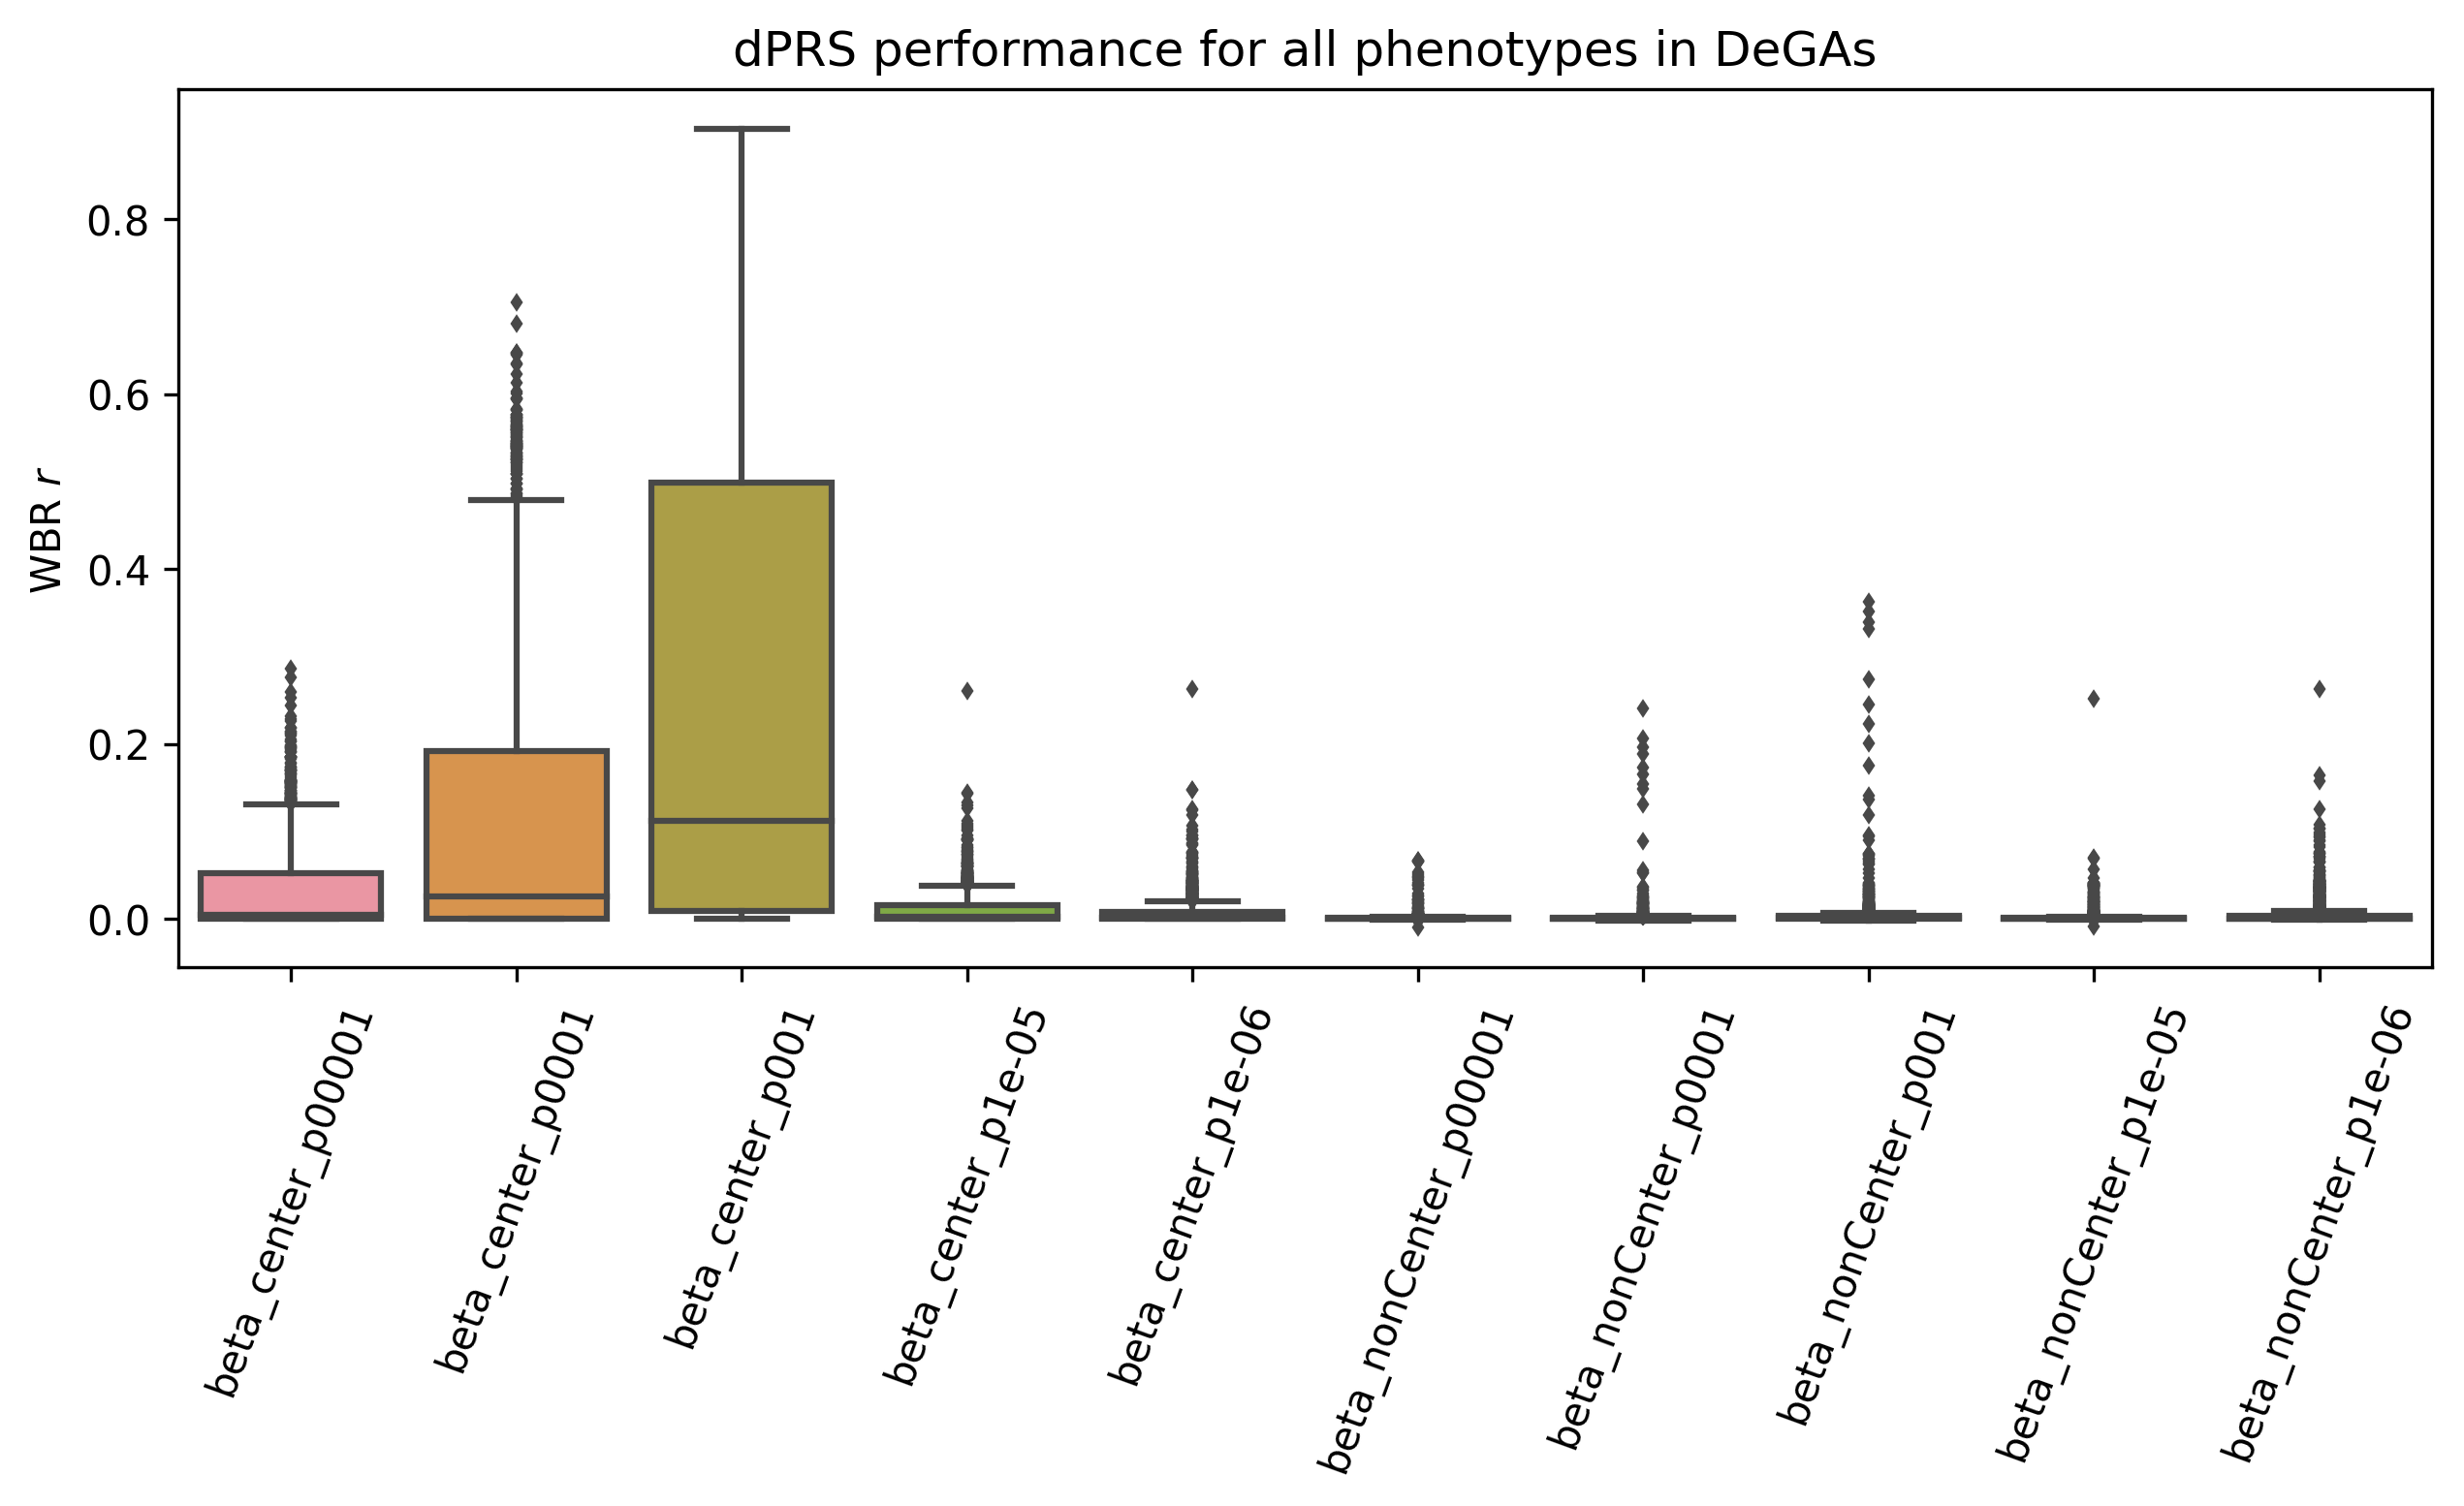

In [5]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=wbr.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(rotation=70), plt.xlabel('')
plt.ylabel('WBR '+'$r$')
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [6]:
nbw=pd.DataFrame([datas[ds]['NBW_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
nbw.head()

,beta_nonCenter_p0001,beta_center_p0001,beta_nonCenter_p00001,beta_center_p001,beta_nonCenter_p001,beta_nonCenter_p1e-06,beta_center_p1e-05,beta_center_p1e-06,beta_nonCenter_p1e-05,beta_center_p00001
BIN10030500,5.440586e-07,0.000151,-0.000037,0.000750,0.000011,0.000211,-0.000039,-0.000035,-0.000031,0.000019
BIN10030510,2.127421e-04,0.000894,-0.000025,0.001457,0.000007,0.000246,-0.000032,-0.000007,0.000063,0.000126
BIN10030800,-3.427918e-05,0.000366,0.000003,0.000122,0.000516,-0.000003,0.000669,0.000717,0.000006,0.000628
BIN10030820,2.808381e-04,0.002751,0.000427,0.002533,0.000134,0.000672,0.002855,0.002827,0.000560,0.002893
BIN1020483,-3.872526e-05,-0.000010,-0.000015,0.000014,0.000069,-0.000036,0.000007,0.000033,0.000091,-0.000017


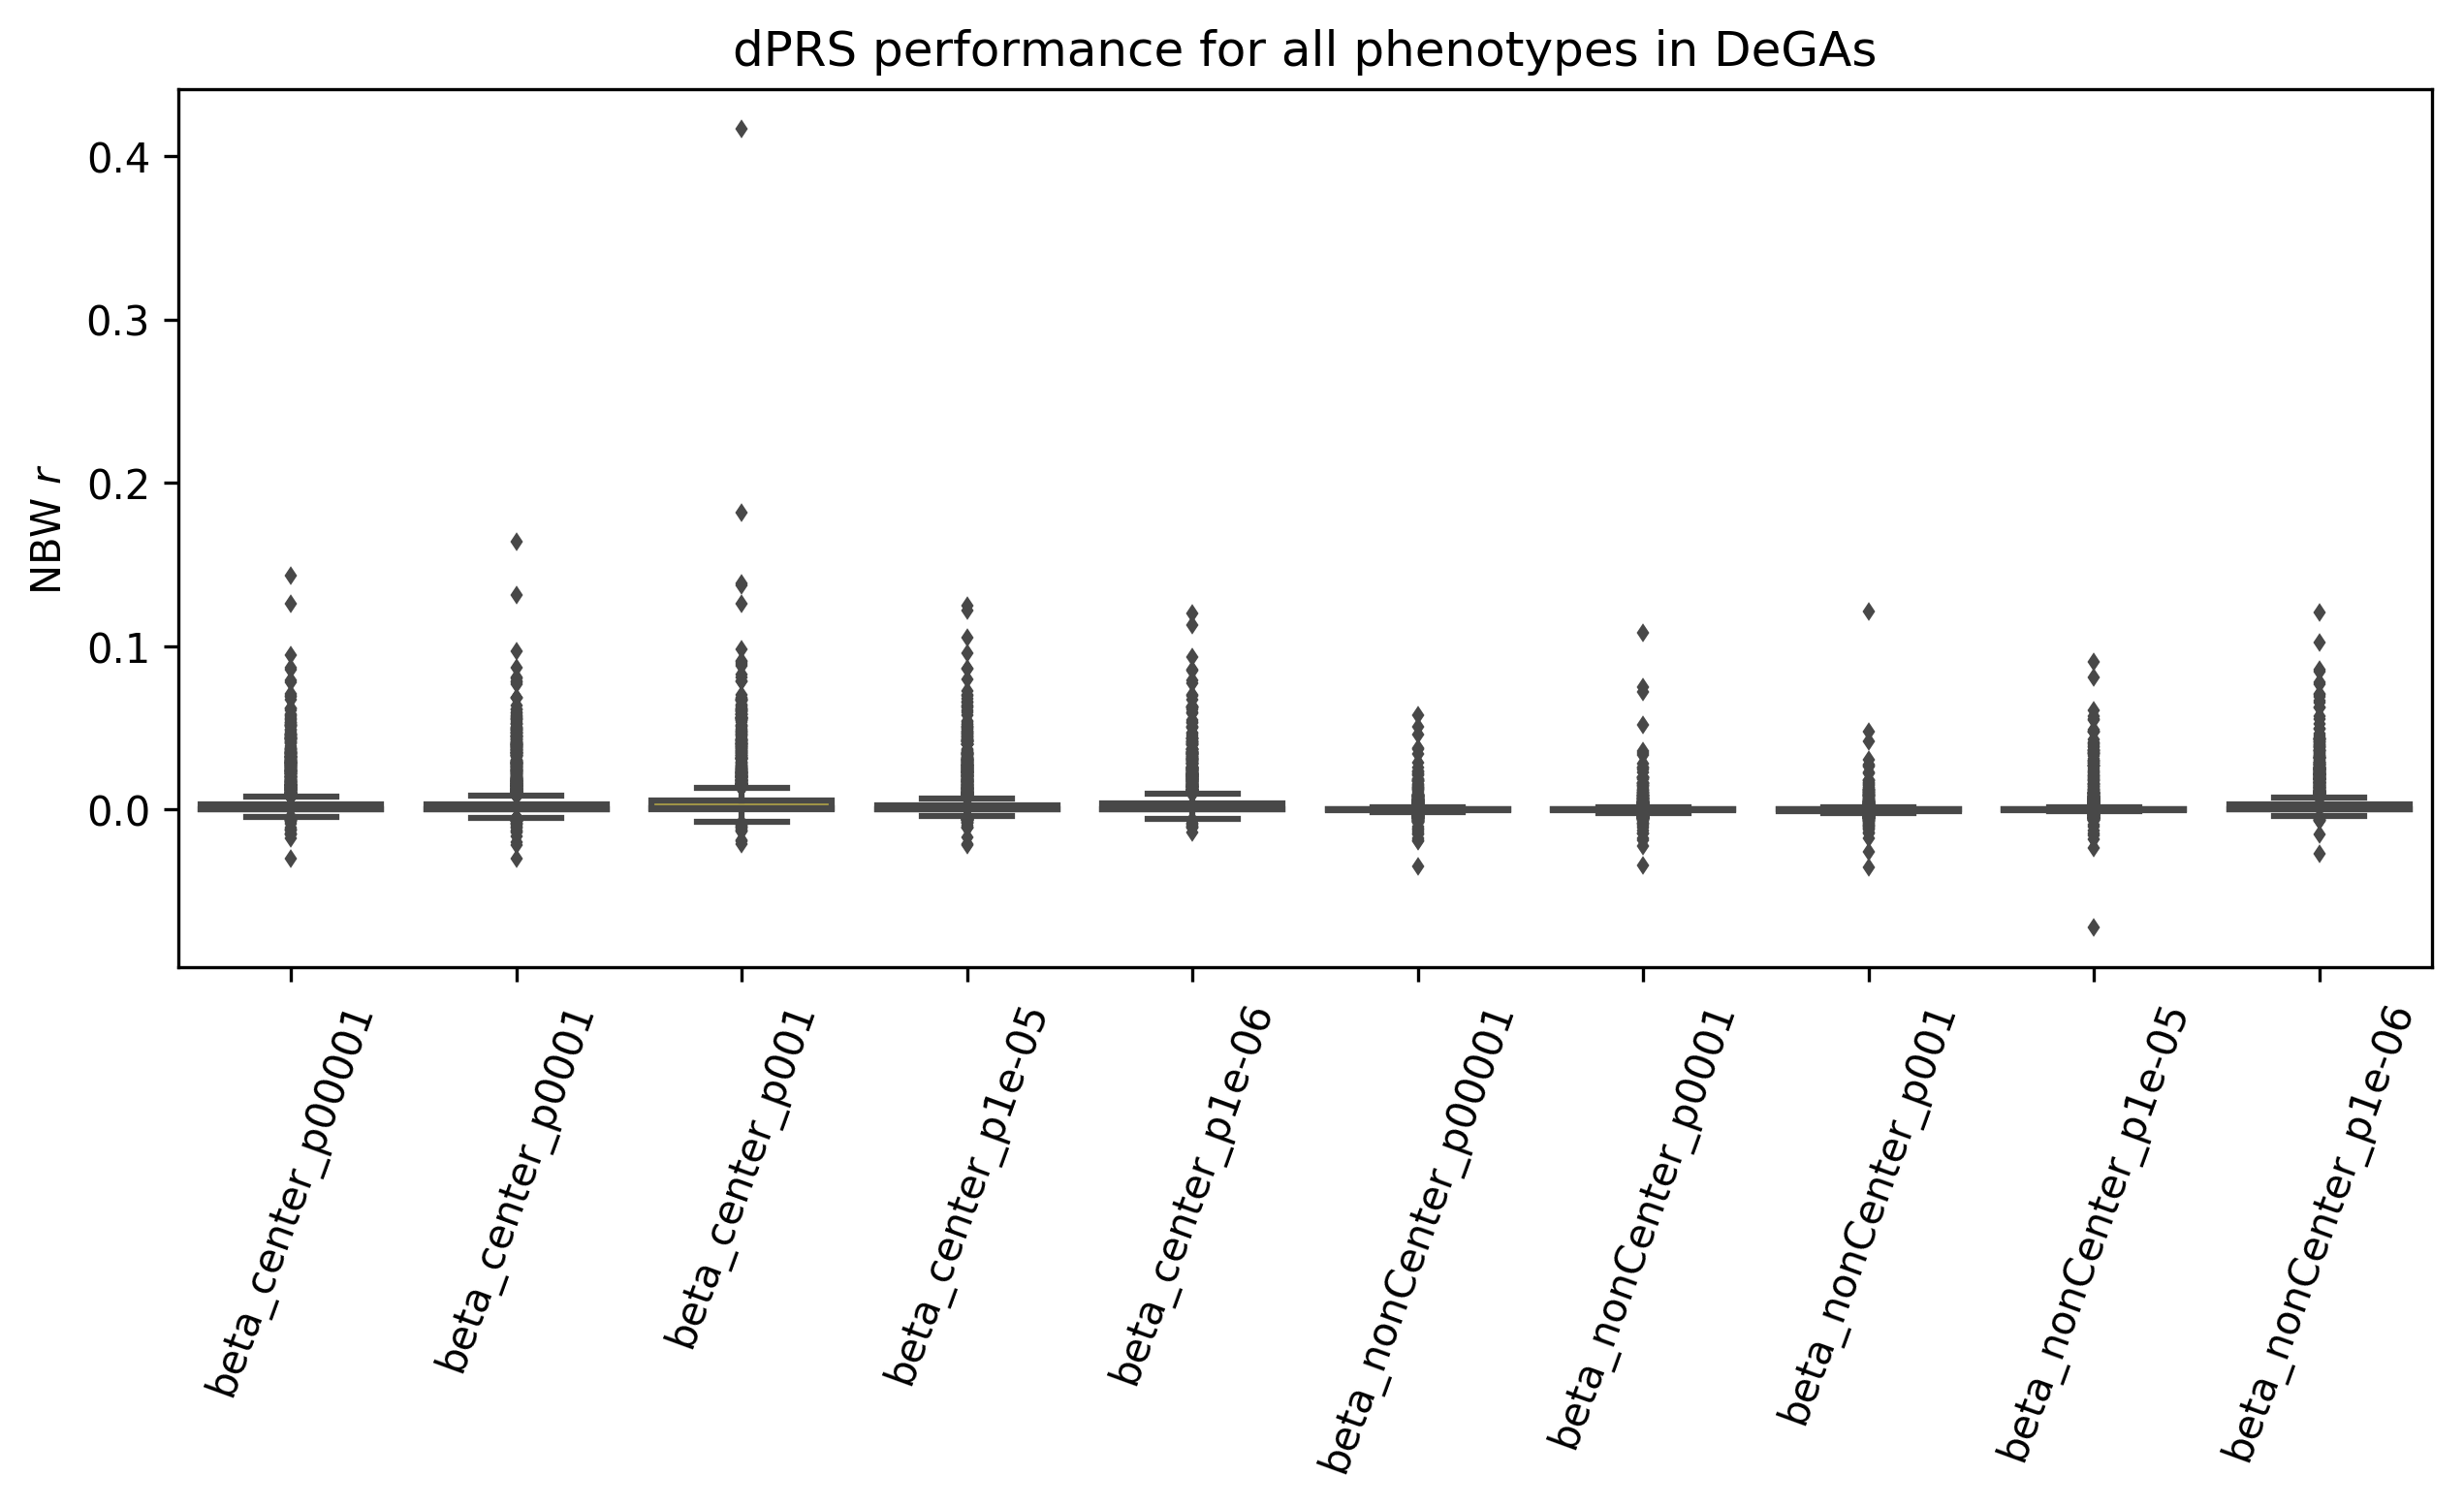

In [7]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=nbw.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(rotation=70), plt.xlabel('')
plt.ylabel('NBW '+'$r$')
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [8]:
datas['beta_center_p001'].sort_values('WBR')[::-1].head()

KeyError: 'WBR'

In [ ]:
datas['beta_center_p001'].sort_values('NBW')[::-1].dropna().head()

In [ ]:
pd.DataFrame([datas[d].loc['INI50',:] for d in datas], index=[d for d in datas]).sort_values('NBW')[::-1]

In [ ]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['beta_center_p001']['WBR'], datas['beta_center_p001']['NBW'], '.')
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('WBR '+'$r$'), plt.ylabel('NBW '+'$r$')
plt.show()